<a href="https://colab.research.google.com/github/plaban1981/FASTAI_2021/blob/main/FASTAI2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* A dataset called the Oxford-IIIT Pet Dataset that contains 7,349 images of cats and dogs from 37 different breeds will be downloaded from the fast.ai datasets collection to the GPU server you are using, and will then be extracted.
* A pretrained model that has already been trained on 1.3 million images, using a competition-winning model will be downloaded from the internet.
* The pretrained model will be fine-tuned using the latest advances in transfer learning, to create a model that is specially customized for recognizing dogs and cats.

In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [2]:
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [3]:
def is_cat(x): return x[0].isupper()

In [5]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.158788,0.014317,0.003383,00:52


epoch,train_loss,valid_loss,error_rate,time
0,0.079606,0.025015,0.005413,00:47


In [8]:
#hide_output
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [10]:
import matplotlib.pyplot as plt

Is this a cat?: True.
Probability it's a cat: 1.000000


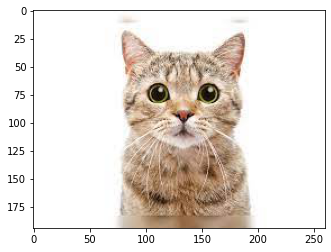

In [11]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
plt.imshow(img)